In [24]:
# 1. 필요한 라이브러리 임포트
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [25]:
# 2. 데이터 로드 및 스케일링
X_train = pd.read_csv('data/training_data/preprocessed_data.csv')
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# 3. PCA 적용 (차원 축소, 분산 비율 99.5%)
pca = PCA(n_components=0.995, random_state=123)
X_train_pca = pca.fit_transform(X_train_scaled)
print("Data form after PCA :", X_train_pca.shape)


PCA 후 데이터 형태: (400, 371)


In [27]:
# UMAP으로 차원을 10으로 축소
umap_reducer = umap.UMAP(n_components=10, random_state=123)
X_train_umap = umap_reducer.fit_transform(X_train_scaled)

c:\Users\danie\miniconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# 5. DBSCAN 클러스터링 적용
# PCA 또는 UMAP 중 선택하여 DBSCAN을 적용할 수 있습니다.
# PCA 적용 데이터로 DBSCAN 수행
# UMAP을 적용한 데이터로 DBSCAN 수행
# DBSCAN 모델 재설정
dbscan = DBSCAN(eps=10.0, min_samples=5)  # eps 값을 10으로, min_samples를 5로 설정
dbscan_labels = dbscan.fit_predict(X_train_umap)

# 새로운 클러스터 레이블 출력
unique_labels = set(dbscan_labels)
print("After adjusted cluster label:", unique_labels)

조정 후 클러스터 레이블: {np.int64(0)}


In [ ]:
# 6. 클러스터 평가 (Silhouette Score와 Davies Bouldin Score)
# 클러스터 평가
# 클러스터 평가
if len(unique_labels) > 1:  # 적어도 2개의 클러스터가 있는 경우에만 평가
    silhouette_avg = silhouette_score(X_train_umap, dbscan_labels)
    davies_bouldin = davies_bouldin_score(X_train_umap, dbscan_labels)
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies Bouldin Score: {davies_bouldin}')
else:
    print("Not enough to evaluate clusters.")

평가할 클러스터가 충분하지 않습니다.


c:\Users\danie\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\danie\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


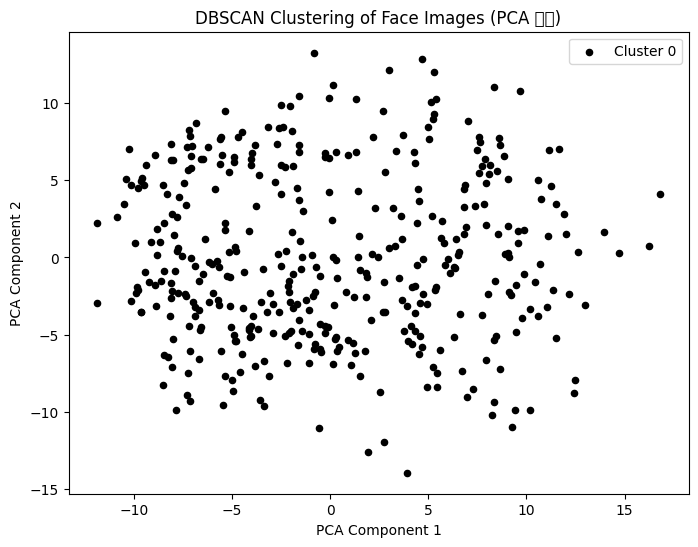

In [ ]:
# 7. 클러스터 시각화 (PCA 적용 데이터)
plt.figure(figsize=(8, 6))
unique_labels = set(dbscan_labels)
for label in unique_labels:
    if label == -1:
        color = 'black'  # 노이즈는 검은색으로 표시
        label_name = 'Noise'
    else:
        color = plt.cm.nipy_spectral(float(label) / len(unique_labels))
        label_name = f'Cluster {label}'
    
    mask = (dbscan_labels == label)
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], c=[color], label=label_name, s=20)
    
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering of Face Images (PCA Applied)')
plt.legend()
plt.show()

In [ ]:
# 8. 검증 및 테스트 데이터에 파이프라인 적용
X_val = pd.read_csv("data/validation_data/umist_val_for_cluster.csv")
X_test = pd.read_csv("data/test_data/umist_test_for_cluster.csv")

# 스케일링과 PCA를 차례로 적용하여 검증 데이터 준비
X_val_scaled = scaler.transform(X_val)
X_val_pca = pca.transform(X_val_scaled)

# DBSCAN 클러스터링 적용
dbscan_labels_val = dbscan.fit_predict(X_val_pca)
print("Validated data DBSCAN Label:", set(dbscan_labels_val))

검증 데이터 DBSCAN 레이블: {np.int64(-1)}
